# Advanced Machine Learning (CS4662). Cal State Univ. LA, CS Dept.
### Dr. Mohammad Porhoumayoun
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

## Deep Convolutional Neural Networks (CNN) with Keras + TensorFlow
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:

# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

import numpy as np

from tensorflow.keras import layers

## Let's use the Fashion-MNIST Dataset including 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images:

0:	T-shirt/top, 
1:	Trouser,
2:	Pullover,
3:	Dress,
4:	Coat,
5:	Sandal,
6:	Shirt,
7:	Sneaker,
8:	Bag,
9:	Ankle boot 

In [3]:
# Keras will download MNIST dataset for us:
from keras.datasets import fashion_mnist
 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


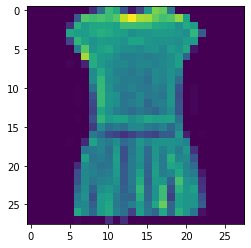

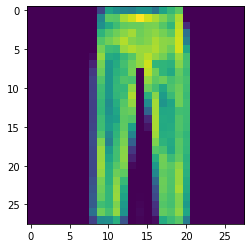

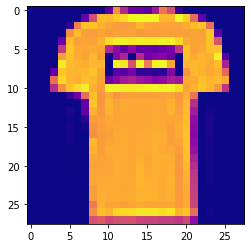

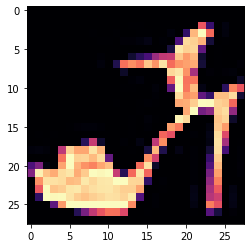

In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap='plasma')
plt.show()
imgplot = plt.imshow(X_train[9,:,:],cmap='magma')
plt.show()


In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
# simply normalize the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
# output label:
print (y_train.shape)
print (y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [10]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [11]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Define the Network Architecture (model):

In [12]:
# Declare Sequential model fro our network:
model = Sequential()

In [13]:
# CNN first layer (with 32 3x3 filter):
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1), padding="same"))
print(model.output_shape) # with no zero padding -> (None, 26, 26, 32)

# If your image batch is of N images of HxW size with C channels: 
# theano uses the NCHW ordering while tensorflow uses the NHWC ordering.

(None, 28, 28, 32)


In [14]:
# more hidden layers:
model.add(Convolution2D(32, (3, 3), activation='relu', padding="same"))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.25)) 


(None, 28, 28, 32)
(None, 14, 14, 32)


In [15]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.output_shape)

(None, 6272)
(None, 128)
(None, 10)


## Compile the model:
#### We need to compile the model and then it will be ready to train it:

In [16]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')
# more info about loss functions: https://keras.io/losses
# more infor about Optimizers: https://keras.io/optimizers

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

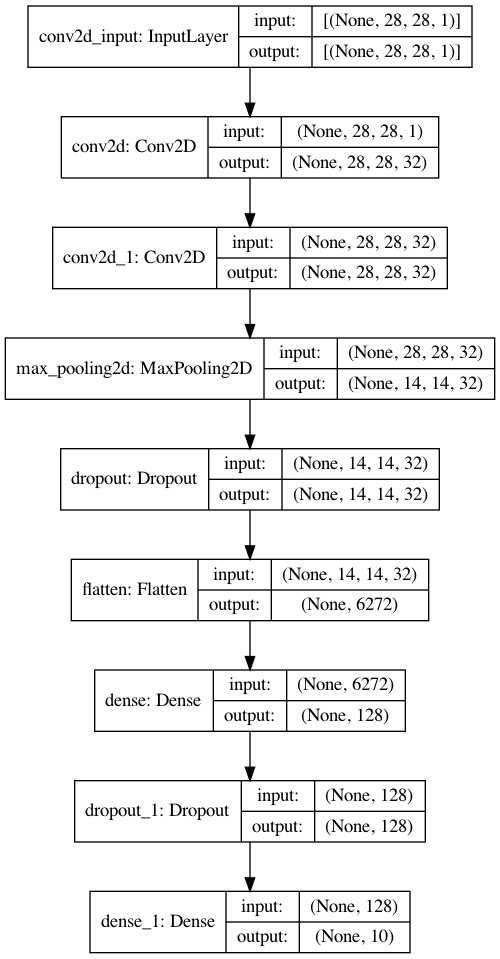

In [17]:
keras.utils.plot_model(model, show_shapes=True)

In [18]:

#1 model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1), padding="same"))
#2 model.add(Convolution2D(32, (3, 3), activation='relu', padding="same"))

# Pooling Layer:
#model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
#model.add(Dropout(0.25)) 

# output Fully connected Dense layers:
#model.add(Flatten())


#3 model.add(Dense(128, activation='relu'))


#model.add(Dropout(0.5))
#4model.add(Dense(10, activation='softmax'))






# 320 = (3x3+1)x32 filters
# 9248 = (3x3x32+1)x32 filters
# 802944 = (6272+1)x128
# 1290 = (128+1)x10

## Training:

In [19]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1)
# history = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=5, verbose=1)

# batch_size: Integer or None. Number of samples per gradient update. 
# epochs: Number of iteration over the entire training data. 
# verbose: 0, 1, or 2. how want to see the training progress. 0 = silent, 1 = progress bar, 2 = one line per epoch.
# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. 
# You can add some callbacks to get a view on internal states and statistics of the model during training:
# https://keras.io/callbacks/     

Epoch 1/5
1407/1407 [==============================] - 37s 26ms/step - loss: 0.6855 - accuracy: 0.7537 - val_loss: 0.3198 - val_accuracy: 0.8819
Epoch 2/5
1407/1407 [==============================] - 41s 29ms/step - loss: 0.3538 - accuracy: 0.8738 - val_loss: 0.2700 - val_accuracy: 0.8985
Epoch 3/5
1407/1407 [==============================] - 43s 31ms/step - loss: 0.3030 - accuracy: 0.8912 - val_loss: 0.2546 - val_accuracy: 0.9083
Epoch 4/5
1407/1407 [==============================] - 44s 31ms/step - loss: 0.2572 - accuracy: 0.9042 - val_loss: 0.2382 - val_accuracy: 0.9123
Epoch 5/5
1407/1407 [==============================] - 43s 30ms/step - loss: 0.2381 - accuracy: 0.9118 - val_loss: 0.2168 - val_accuracy: 0.9200


In [22]:
# Training with callbacks:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, min_delta=0)
# fitted_model = model.fit(X_train, y_train, validation_split=0.25, 
#                       batch_size=32, epochs=5, callbacks=[callback], verbose=1)

# min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
# patience: Number of epochs with no improvement after which training will be stopped.

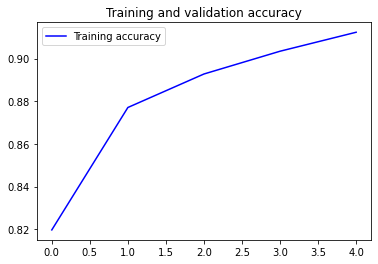

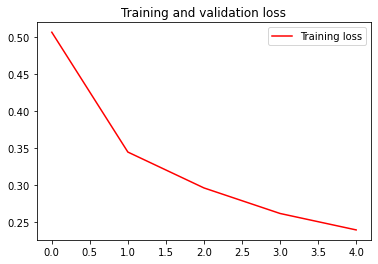

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

## Testing:

In [25]:
predicted_classes = model.predict(X_test)

In [26]:
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.2374 - accuracy: 0.9123
The accuracy is:  0.9122999906539917
